# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Import citipy to generate city names from randomly generated coordinates
from citipy import citipy

# CSV export path
output_data_file = "output_data/cities.csv"

# Ranges for latitude and longitude generator
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating random cities

In [2]:
# List for storing coordinates and city names
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

## Calling OpenWeather API using random cities list


In [3]:
# Constructing base query url for OpenWeather API
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q='

# List to populate with weather values
weather_list = []

# Looping through citipy generated cities as OpenWeather API parameters
for i in cities:
    response = requests.get(base_url + i).json()
    try:
        weather_list.append([response['name'], response['sys']['country'], response['coord']['lat'], response['coord']['lon'],
                           response['main']['temp_max'], response['main']['humidity'], response['wind']['speed'],
                           response['clouds']['all']])
        print(f"Checking city #{cities.index(i) + 1}: {i.title()}, {response['sys']['country']}")
    except:
        print("City not found. Next city...")

Checking city #1: Jamestown, US
Checking city #2: Mar Del Plata, AR
Checking city #3: Severo-Kurilsk, RU
Checking city #4: Mataura, NZ
Checking city #5: Bredasdorp, ZA
Checking city #6: Yellowknife, CA
Checking city #7: Mahibadhoo, MV
Checking city #8: Provideniya, RU
Checking city #9: Meulaboh, ID
Checking city #10: Winkler, CA
Checking city #11: Saint-Philippe, RE
Checking city #12: Vardo, NO
Checking city #13: Leningradskiy, RU
Checking city #14: Makat, KZ
Checking city #15: Kuryk, KZ
City not found. Next city...
Checking city #17: Vaini, TO
Checking city #18: Georgetown, MY
Checking city #19: Lamont, US
Checking city #20: Punta Arenas, CL
Checking city #21: Green River, US
Checking city #22: Kalabo, ZM
Checking city #23: Swan River, CA
Checking city #24: Rikitea, PF
Checking city #25: Yenagoa, NG
City not found. Next city...
City not found. Next city...
Checking city #28: Alofi, NU
Checking city #29: Kuytun, RU
Checking city #30: Hobart, AU
Checking city #31: Amboasary, MG
Checking

Checking city #252: Erzin, TR
Checking city #253: Honiara, SB
Checking city #254: Yaan, NG
Checking city #255: Sabang, ID
Checking city #256: Balarampur, IN
Checking city #257: Odesskoye, RU
Checking city #258: Mabay, PH
Checking city #259: Lokosovo, RU
Checking city #260: Porbandar, IN
Checking city #261: Ponta Do Sol, PT
Checking city #262: Abha, SA
Checking city #263: Tautira, PF
Checking city #264: Paamiut, GL
Checking city #265: Tahta, EG
Checking city #266: Donskoye, RU
Checking city #267: Levelland, US
Checking city #268: Lekoni, GA
Checking city #269: Nemuro, JP
Checking city #270: Galle, LK
Checking city #271: Praya, CV
Checking city #272: Simao, CN
Checking city #273: Hualmay, PE
Checking city #274: Dawlatabad, AF
Checking city #275: Rio Gallegos, AR
Checking city #276: Oistins, BB
Checking city #277: Batsfjord, NO
Checking city #278: Brigantine, US
Checking city #279: La Ronge, CA
Checking city #280: Yarmouth, US
Checking city #281: Vestmannaeyjar, IS
Checking city #282: Asy

Checking city #501: Sechura, PE
Checking city #502: Kayerkan, RU
Checking city #503: Abu Samrah, SY
Checking city #504: Mastic Beach, US
Checking city #505: Calama, CL
City not found. Next city...
Checking city #507: Arica, CL
Checking city #508: Hovin, NO
Checking city #509: Pathein, MM
Checking city #510: Kroya, ID
Checking city #511: Tilichiki, RU
Checking city #512: Shelburne, CA
Checking city #513: Tandil, AR
Checking city #514: Iguape, BR
City not found. Next city...
Checking city #516: Sirhind, IN
Checking city #517: Oytal, KZ
Checking city #518: Pochutla, MX
Checking city #519: Gornyak, RU
Checking city #520: Baykit, RU
Checking city #521: Hervey Bay, AU
Checking city #522: Ugleuralskiy, RU
Checking city #523: Salinas, US
Checking city #524: Mashhad, IR
Checking city #525: Terekli-Mekteb, RU
Checking city #526: Manakara, MG
Checking city #527: Zaltan, LY
Checking city #528: Smolenka, RU
Checking city #529: Juarez, MX
Checking city #530: Nisia Floresta, BR
Checking city #531: Qa

## Weather dataframe and output

In [4]:
# Converting weather data list to dataframe
weather_df = pd.DataFrame(weather_list, columns=['City', 'Country', 'Latitude', 'Longitude', 'Max Temp (F)', 
                                                 'Humidity %', 'Wind (mph)', 'Cloudiness %'])

In [5]:
# Output of weather dataframe for VacationPy exercise
weather_df.to_csv(output_data_file)

In [6]:
weather_df.head(10)

,City,Country,Latitude,Longitude,Max Temp (F),Humidity %,Wind (mph),Cloudiness %
0,Jamestown,US,42.10,-79.24,73.40,53,3.36,1
1,Mar del Plata,AR,-38.00,-57.56,48.00,81,9.17,88
2,Severo-Kuril'sk,RU,50.68,156.12,56.64,89,9.13,97
3,Mataura,NZ,-46.19,168.86,51.80,79,1.86,100
4,Bredasdorp,ZA,-34.53,20.04,46.40,93,5.82,0
5,Yellowknife,CA,62.46,-114.35,71.60,46,13.87,40
6,Mahibadhoo,MV,3.78,72.97,82.76,77,16.42,75
7,Provideniya,RU,64.38,-173.30,51.80,71,13.42,90
8,Meulaboh,ID,4.14,96.13,77.22,80,4.50,100
9,Winkler,CA,49.18,-97.94,82.40,54,6.93,1


In [7]:
weather_df.describe()

,Latitude,Longitude,Max Temp (F),Humidity %,Wind (mph),Cloudiness %
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.00000
mean,19.455866,14.965650,68.868989,71.900722,7.788718,49.68231
std,33.235411,87.631032,13.793482,20.052442,5.159078,38.68723
min,-54.800000,-179.170000,33.800000,2.000000,0.110000,0.00000
25%,-7.817500,-62.632500,57.817500,63.000000,3.940000,5.00000
50%,22.315000,19.985000,70.890000,77.000000,6.930000,46.50000
75%,47.665000,81.740000,79.462500,87.000000,10.465000,90.00000
max,78.220000,178.420000,118.400000,100.000000,55.830000,100.00000


## Comparing latitude values across different weather dimensions

In [8]:
# Creating scatterplot builder function
def scatter_builder(x_axis, y_axis):
    # Plot size
    plt.figure(figsize=(12,8))
    # Plot constructor
    weather_scatter = plt.scatter(weather_df[x_axis], weather_df[y_axis], edgecolors='black')
    # Plot formatting
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{x_axis} to {y_axis} on (7/30/2020)')
    # Plot display
    plt.show()

### Latitude vs. Temperature

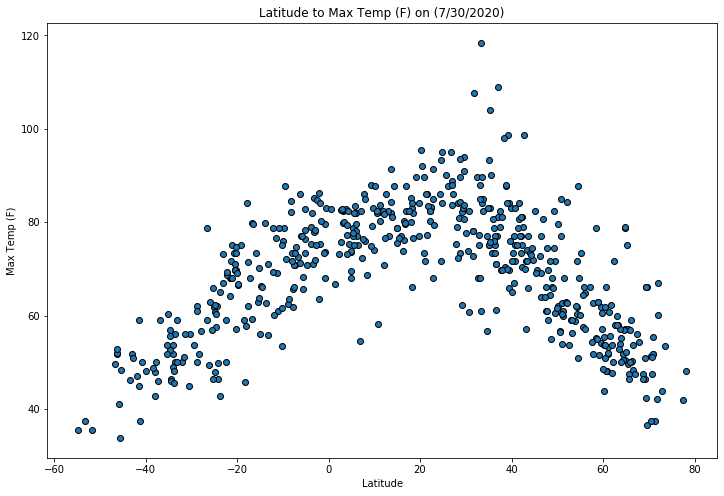

In [9]:
scatter_builder('Latitude', 'Max Temp (F)')

### Latitude vs. Humidity

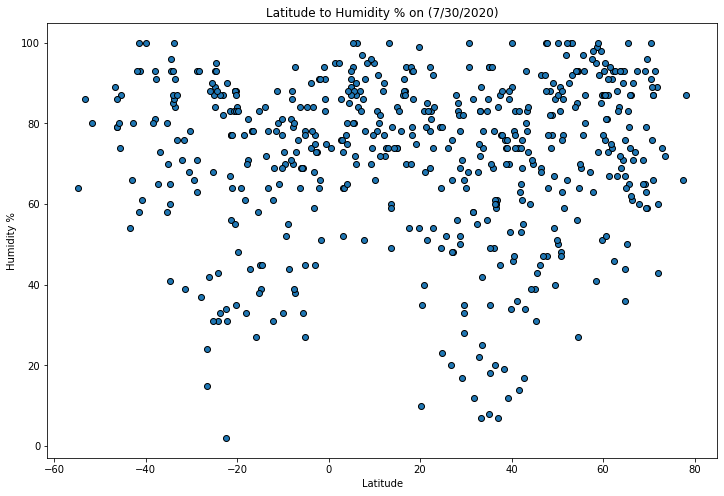

In [10]:
scatter_builder('Latitude', 'Humidity %')

### Latitude vs. Cloudiness

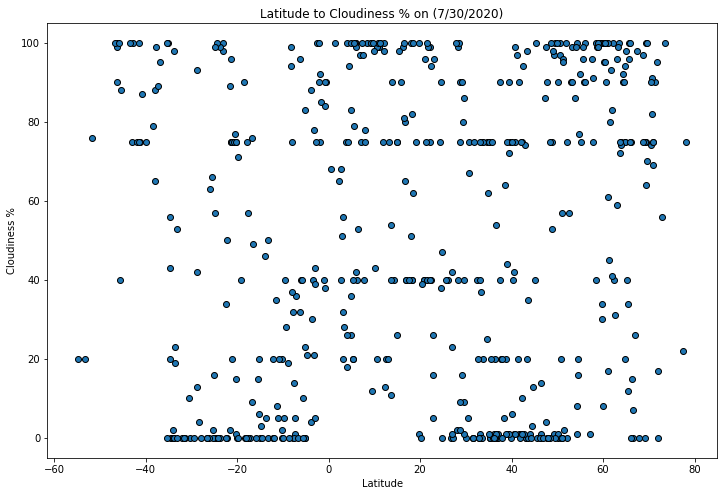

In [11]:
scatter_builder('Latitude', 'Cloudiness %')

### Latitude vs. Wind Speed

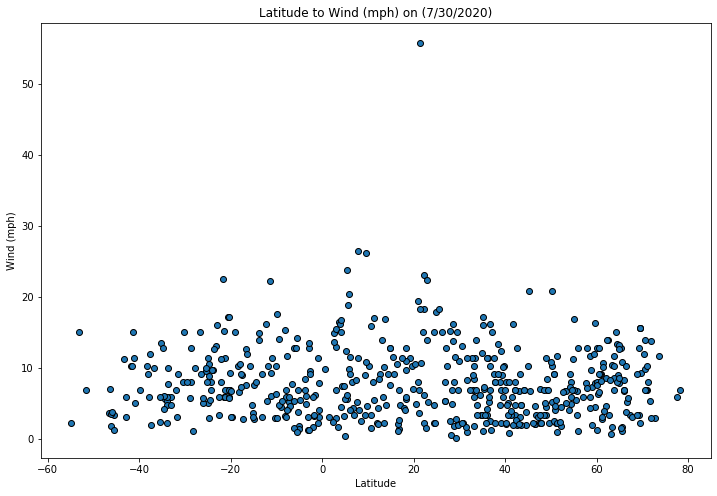

In [12]:
scatter_builder('Latitude', 'Wind (mph)')

## Linear Regression

In [13]:
# Creating linear regression function
def regression_plotter(hemisphere, x_axis, y_axis):
    # Storing column references into variables
    x = hemisphere[x_axis]
    y = hemisphere[y_axis]
    # Building scatterplot
    plt.figure(figsize=(12,8))
    plt.scatter(x, y, edgecolors='black')
    # Extracting and plotting regression variables
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x, regress_values, "r-", alpha=.75)
    # Plot formatting
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{x_axis} to {y_axis} on (7/30/2020)')
    plt.annotate(line_eq, (x.min() + 5, y.min() + 10), fontsize=14,color="red")
    print(f'The r-squared value is {rvalue**2}')
    plt.show()

In [14]:
# Creating Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df['Latitude'] > 0, :]
southern = weather_df.loc[weather_df['Latitude'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.47093864659593443


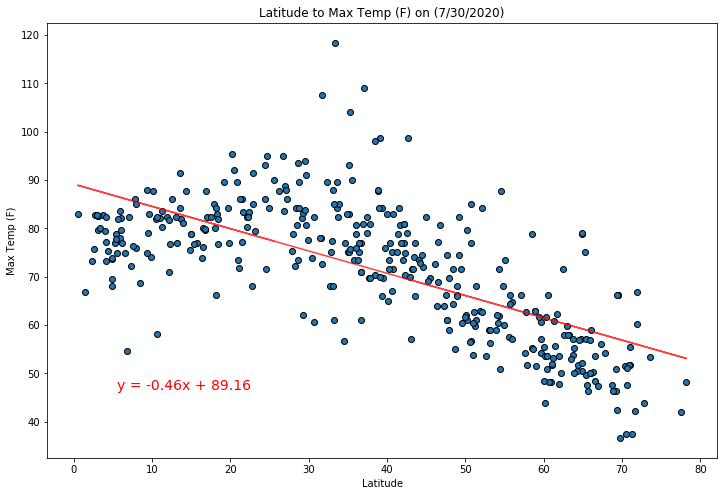

In [15]:
regression_plotter(northern, 'Latitude', 'Max Temp (F)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.6621686840419556


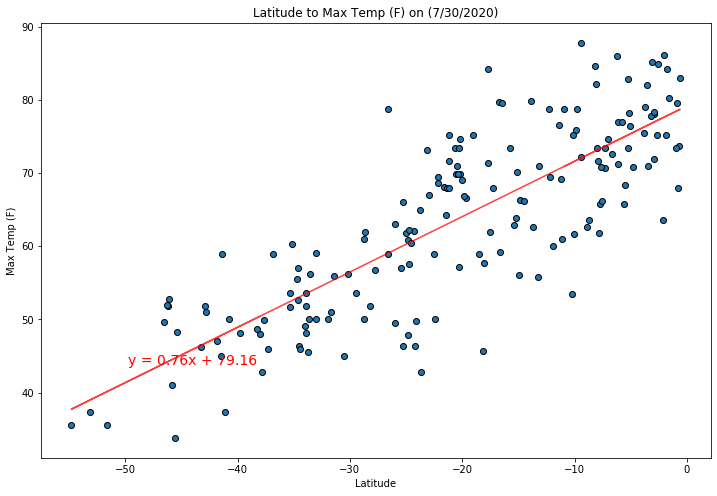

In [16]:
regression_plotter(southern, 'Latitude', 'Max Temp (F)')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 1.5775959262382286e-05


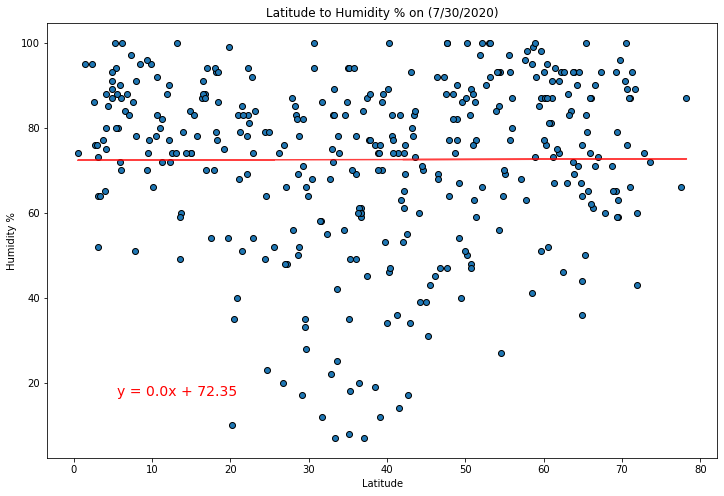

In [17]:
regression_plotter(northern, 'Latitude', 'Humidity %')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.021760051330349205


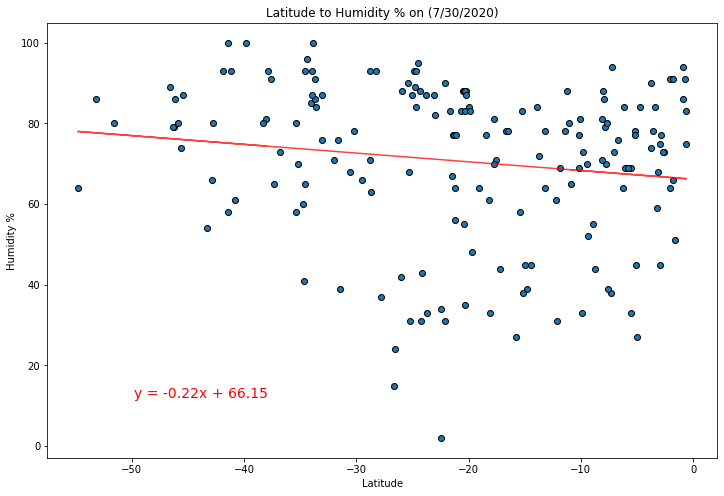

In [18]:
regression_plotter(southern, 'Latitude', 'Humidity %')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.001870983820194554


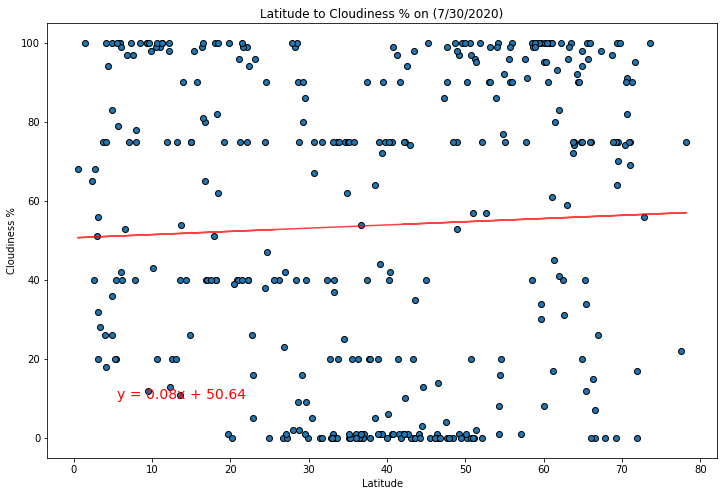

In [19]:
regression_plotter(northern, 'Latitude', 'Cloudiness %')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.03183533892393178


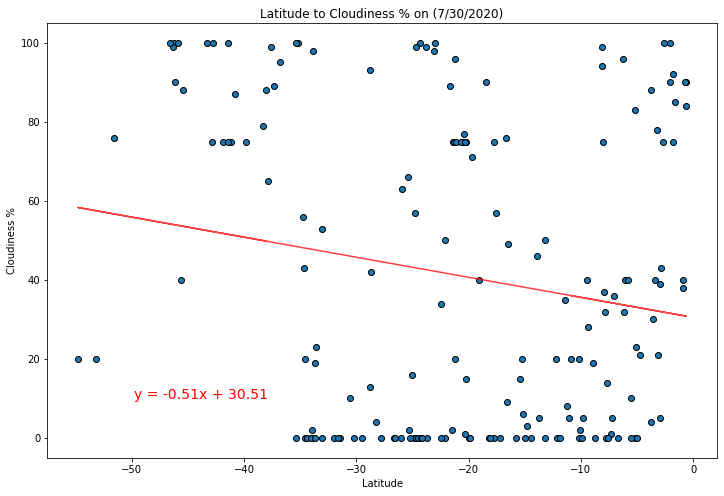

In [20]:
regression_plotter(southern, 'Latitude', 'Cloudiness %')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.01586465631247633


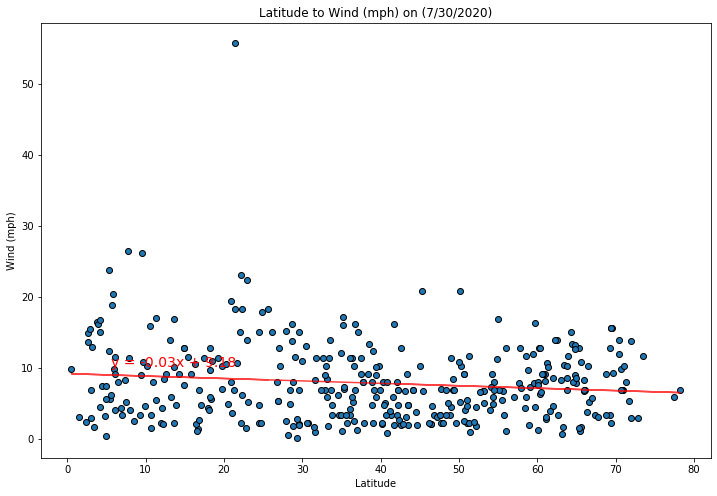

In [21]:
regression_plotter(northern, 'Latitude', 'Wind (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0006101069026671144


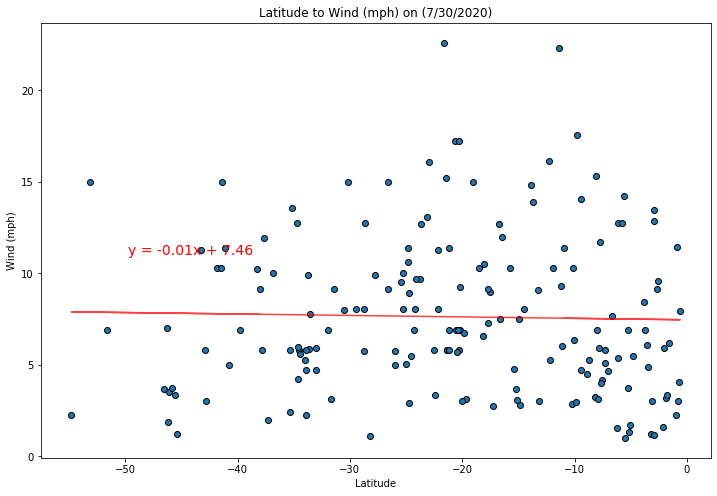

In [22]:
regression_plotter(southern, 'Latitude', 'Wind (mph)')